<a href="https://colab.research.google.com/github/GoryninLA/my_works_prog/blob/main/lab_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обход дерева (in-order traversal):
5 10 12 18 20 22 25 

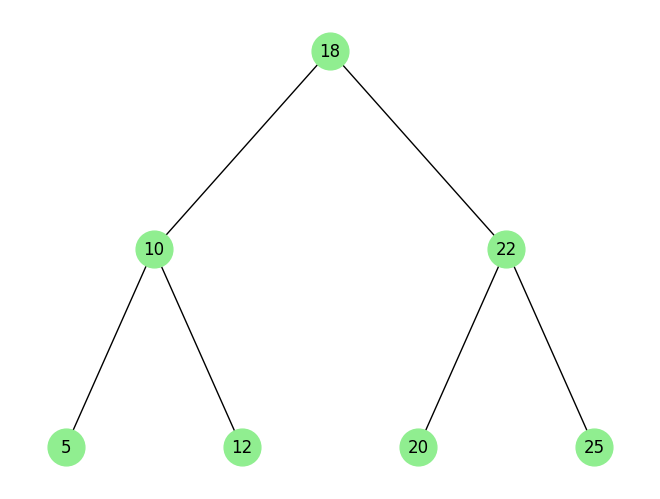


Найден узел со значением: 20
Удаление узла со значением 22
Обход дерева после удаления (in-order traversal):
5 10 12 18 20 25 

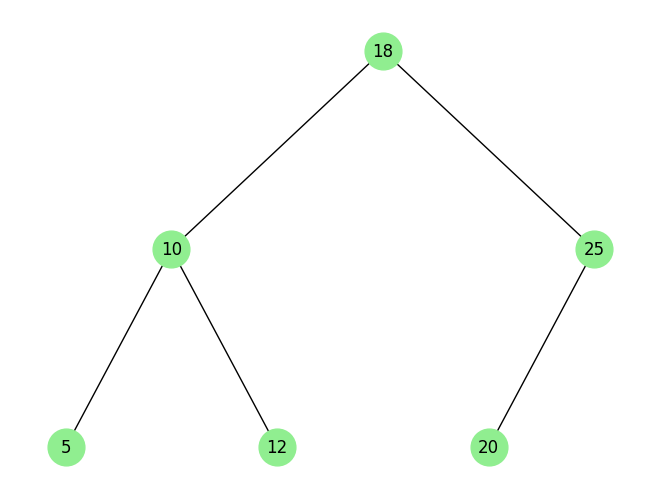

Исходный массив: [18, 22, 10, 5, 12, 20, 25]
Отсортированный массив: [22, 12, 25, 10, 20, 5, 18]


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Класс узла
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Класс бинарного дерева поиска
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        def _insert(current, value):
            if current is None:
                return Node(value)
            if value < current.value:
                current.left = _insert(current.left, value)
            else:
                current.right = _insert(current.right, value)
            return current

        self.root = _insert(self.root, value)

    def inorder_traversal(self):
        def _inorder(node):
            if node:
                _inorder(node.left)
                print(node.value, end=' ')
                _inorder(node.right)
        _inorder(self.root)

    def find(self, value):
        def _find(current, value):
            if current is None:
                return None
            if current.value == value:
                return current
            elif value < current.value:
                return _find(current.left, value)
            else:
                return _find(current.right, value)
        return _find(self.root, value)

    def delete(self, value):
        def _delete(current, value):
            if current is None:
                return None
            if value < current.value:
                current.left = _delete(current.left, value)
            elif value > current.value:
                current.right = _delete(current.right, value)
            else:
                # Найден узел, который нужно удалить
                if current.left is None:
                    return current.right
                elif current.right is None:
                    return current.left
                else:
                    # Два потомка — ищем минимальный в правом поддереве
                    successor = current.right
                    while successor.left:
                        successor = successor.left
                    current.value = successor.value
                    current.right = _delete(current.right, successor.value)
            return current
        self.root = _delete(self.root, value)


# Функция для построения графа из дерева
def add_edges(graph, node, pos={}, x=0, y=0, level=1):
    if node:
        graph.add_node(node.value)
        pos[node.value] = (x, y)
        if node.left:
            graph.add_edge(node.value, node.left.value)
            add_edges(graph, node.left, pos, x - 1 / level, y - 1, level + 1)
        if node.right:
            graph.add_edge(node.value, node.right.value)
            add_edges(graph, node.right, pos, x + 1 / level, y - 1, level + 1)
    return graph, pos

# Создание дерева и вставка значений
bst = BinarySearchTree()
values = [18, 22, 10, 5, 12, 20, 25]
for v in values:
    bst.insert(v)

print("Обход дерева (in-order traversal):")
bst.inorder_traversal()

G = nx.DiGraph()
G, pos = add_edges(G, bst.root)

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, arrows=False)
plt.show()

found_node = bst.find(20)
if found_node:
    print(f"\nНайден узел со значением: {found_node.value}")
else:
    print(f"\nУзел со значением {found_node.value} не найден.")

# Удаление 22

# Удаление узла
print(f"Удаление узла со значением 22")
bst.delete(22)

print("Обход дерева после удаления (in-order traversal):")
bst.inorder_traversal()

# Визуализация
G = nx.DiGraph()
G, pos = add_edges(G, bst.root)

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, arrows=False)
plt.show()


def heapify(arr, n, i):
    largest = i
    left = 2 * i
    right = 2 * i

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 , -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)
# Пример использования
arr = [18, 22, 10, 5, 12, 20, 25]
print("Исходный массив:", arr)

heap_sort(arr)
print("Отсортированный массив:", arr)


In [15]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i
    right = 2 * i + 1

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)
# Пример использования
arr = [18, 22, 10, 5, 12, 20, 25]
print("Исходный массив:", arr)

heap_sort(arr)
print("Отсортированный массив:", arr)

Исходный массив: [18, 22, 10, 5, 12, 20, 25]
Отсортированный массив: [5, 10, 12, 18, 20, 22, 25]
